In [2]:
import pandas as pd
import seaborn as sns
%pylab inline
from pandas import DataFrame, Series

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [4]:
homes = pd.read_csv(r'..\data\train.csv', index_col=0)

In [5]:
homes.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1125,80,RL,NaN,9125,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,163900
285,120,RL,50.0,8012,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,179200
1232,90,RL,70.0,7728,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2006,WD,Normal,132500
1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
316,60,RL,71.0,7795,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,188500


In [6]:
homes.shape

(1460, 80)

In [18]:
homes.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


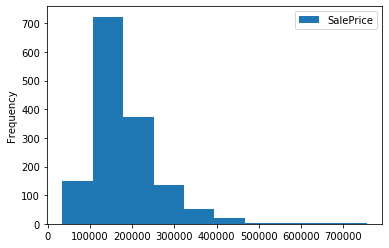

In [24]:
homes[["SalePrice"]].plot.hist()

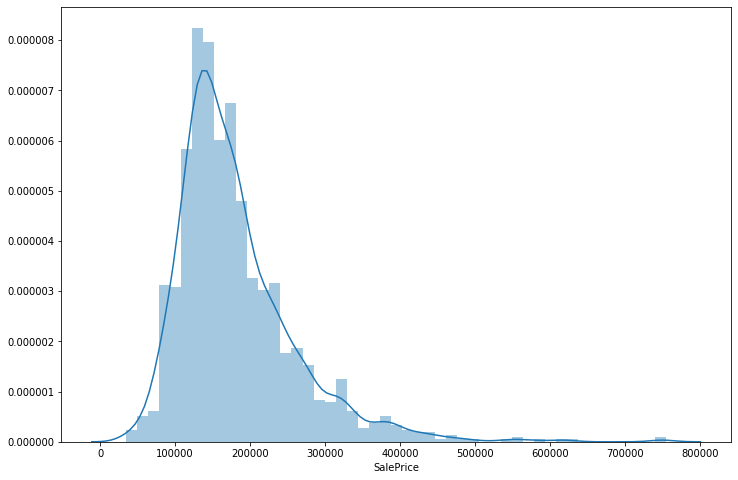

In [26]:
sns.distplot(homes["SalePrice"])


In [27]:
homes["LotArea"]

Id
1        8450
2        9600
3       11250
4        9550
5       14260
        ...  
1456     7917
1457    13175
1458     9042
1459     9717
1460     9937
Name: LotArea, Length: 1460, dtype: int64

In [42]:
# scatter matrix/plot columns - YrSold,MonthSold,TotRmsAbvGrd,Bedroom,FullBath,HalfBath,1stFlrSF,2ndFlrSF,TotalBsmtSF
numb_cols = "YrSold,MoSold,TotRmsAbvGrd,BedroomAbvGr,FullBath,HalfBath,1stFlrSF,2ndFlrSF,TotalBsmtSF,GrLivArea".split(",")
numb_cols

['YrSold',
 'MoSold',
 'TotRmsAbvGrd',
 'BedroomAbvGr',
 'FullBath',
 'HalfBath',
 '1stFlrSF',
 '2ndFlrSF',
 'TotalBsmtSF',
 'GrLivArea']

In [33]:
from yellowbrick.features import Rank2D
pcv = Rank2D(
    features= homes[numb_cols], algorithm="pearson"
)
pcv.fit(homes[numb_cols], homes["SalePrice"])
pcv.transform(homes[numb_cols])
pcv.poof()

YellowbrickValueError: number of supplied feature names does not match the number of columns in the training data.

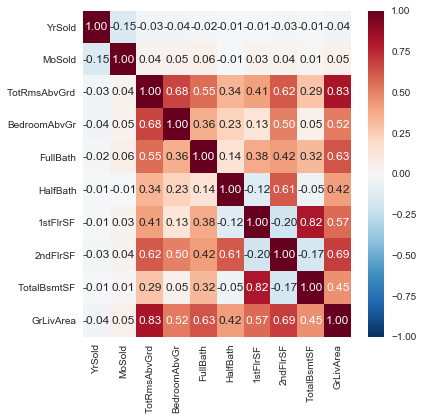

In [43]:
from seaborn import heatmap
heatmap(
    data = homes[numb_cols].corr(),
    fmt=".2f",
    annot=True,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1
)
# TotalRmsAbvGrd highly correlated (.68) with BedroomsAboveGr
# totalRmbsAbv highly correlated (.61) with 2nd floor square footage 
# TotalBasmtSF highly correleated (.82) with basemt square footage (.82)
# TotalBath somewhat correlated (.55) with TotRmsAboveGround
# HalfBath somewhat correlated with 2ndFlrSf (.61) 

# Thus probably shouldn't combine TotalRms Abv Gr with SF or Total Rms and Bedrooms

# probably good to have total bedrooms, total baths and perhaps total SF (see if total SF is highly correlated with baths/bedrooms)
# perhpas could scale SF per room (GrLivArea/TotalRmsAbvGrd)

In [39]:
homes['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [ ]:
homes['KitchenAbvGr']

In [45]:
homes.groupby("Neighborhood")["SalePrice"].median().sort_values(ascending=False)

Neighborhood
NridgHt    315000
NoRidge    301500
StoneBr    278000
Timber     228475
Somerst    225500
Veenker    218000
Crawfor    200624
ClearCr    200250
CollgCr    197200
Blmngtn    191000
NWAmes     182900
Gilbert    181000
SawyerW    179900
Mitchel    153500
NPkVill    146000
NAmes      140000
SWISU      139500
Blueste    137500
Sawyer     135000
BrkSide    124300
Edwards    121750
OldTown    119000
BrDale     106000
IDOTRR     103000
MeadowV     88000
Name: SalePrice, dtype: int64

In [7]:
nborhds = homes.groupby("Neighborhood")["SalePrice"].median().sort_values(ascending=False)
nborhds

Neighborhood
NridgHt    315000
NoRidge    301500
StoneBr    278000
Timber     228475
Somerst    225500
Veenker    218000
Crawfor    200624
ClearCr    200250
CollgCr    197200
Blmngtn    191000
NWAmes     182900
Gilbert    181000
SawyerW    179900
Mitchel    153500
NPkVill    146000
NAmes      140000
SWISU      139500
Blueste    137500
Sawyer     135000
BrkSide    124300
Edwards    121750
OldTown    119000
BrDale     106000
IDOTRR     103000
MeadowV     88000
Name: SalePrice, dtype: int64

In [57]:
nborhds.loc["Timber":"SawyerW"].index.to_list()

['Timber',
 'Somerst',
 'Veenker',
 'Crawfor',
 'ClearCr',
 'CollgCr',
 'Blmngtn',
 'NWAmes',
 'Gilbert',
 'SawyerW']

In [59]:
nborhds.loc["Mitchel":"OldTown"].index.to_list()

['Mitchel',
 'NPkVill',
 'NAmes',
 'SWISU',
 'Blueste',
 'Sawyer',
 'BrkSide',
 'Edwards',
 'OldTown']

In [8]:
first_3 = nborhds[:3].index.to_list()
last_3 = nborhds[-3:].index.to_list()
scnd_grp = nborhds.loc["Timber":"SawyerW"].index.to_list()
thrd_grp = nborhds.loc["Mitchel":"OldTown"].index.to_list()

In [9]:
# nborhds.apply()
from collections import defaultdict

nbrhd_dict = defaultdict(str)
nbrhd_list = nborhds.index.to_list()

for nbrhd in nbrhd_list:
    if nbrhd in first_3:
       nbrhd_dict[nbrhd] = "top_3"
    elif nbrhd in scnd_grp:
        nbrhd_dict[nbrhd] = "second_tier"
    elif nbrhd in thrd_grp:
        nbrhd_dict[nbrhd] = "third_tier"
    else:
        nbrhd_dict[nbrhd] = "bottom_3"


In [10]:
nbrhd_dict

defaultdict(str,
            {'NridgHt': 'top_3',
             'NoRidge': 'top_3',
             'StoneBr': 'top_3',
             'Timber': 'second_tier',
             'Somerst': 'second_tier',
             'Veenker': 'second_tier',
             'Crawfor': 'second_tier',
             'ClearCr': 'second_tier',
             'CollgCr': 'second_tier',
             'Blmngtn': 'second_tier',
             'NWAmes': 'second_tier',
             'Gilbert': 'second_tier',
             'SawyerW': 'second_tier',
             'Mitchel': 'third_tier',
             'NPkVill': 'third_tier',
             'NAmes': 'third_tier',
             'SWISU': 'third_tier',
             'Blueste': 'third_tier',
             'Sawyer': 'third_tier',
             'BrkSide': 'third_tier',
             'Edwards': 'third_tier',
             'OldTown': 'third_tier',
             'BrDale': 'bottom_3',
             'IDOTRR': 'bottom_3',
             'MeadowV': 'bottom_3'})

In [11]:
homes["nbrhd_group"] = homes[["Neighborhood"]].replace(nbrhd_dict).astype("category")

In [12]:
homes.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,nbrhd_group
Id,,,,,,,,,,,,,,,,,,,,,
461,60,FV,75.0,8004,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,12,2009,New,Partial,263435,second_tier
1261,60,RL,NaN,24682,Pave,NaN,IR3,Lvl,AllPub,CulDSac,...,NaN,NaN,NaN,0,6,2009,WD,Normal,181000,second_tier
1143,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2007,New,Partial,424870,second_tier
1163,20,RL,109.0,8724,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2007,WD,Normal,129000,third_tier
427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,Inside,...,NaN,NaN,NaN,0,8,2009,WD,Normal,275000,second_tier


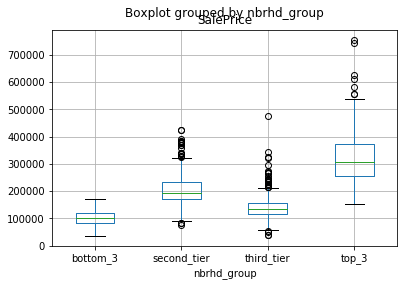

In [18]:
homes[["nbrhd_group", "SalePrice"]].boxplot(column="SalePrice", by="nbrhd_group")

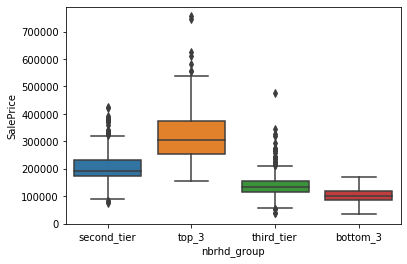

In [19]:
sns.boxplot(x = "nbrhd_group", y = "SalePrice", data = homes)

In [22]:
nbrhd_grp_dummies = pd.get_dummies(data=homes["nbrhd_group"]).drop(labels="bottom_3", axis="columns")

In [43]:
homes = pd.concat([homes, nbrhd_grp_dummies], axis="columns")

In [25]:
# we need to dummify kitchen (Good / Excellent and typical/okay), we also need to have an average sf per room then do a coorelation map
homes["KitchenQual"].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [28]:
homes["KitchenQual"].map({"TA": "ktch_okay", "Fa": "ktch_okay", "Gd": "ktch_good", "Ex": "ktch_topnotch"}).value_counts()

ktch_okay         774
ktch_good         586
kitch_topnotch    100
Name: KitchenQual, dtype: int64

In [33]:
ktch_groups = homes["KitchenQual"].map({"TA": "ktch_okay", "Fa": "ktch_okay", "Gd": "ktch_good", "Ex": "kitch_topnotch"})
ktch_dummies = pd.get_dummies(data=ktch_groups).drop("ktch_okay", axis="columns")
homes = pd.concat([homes, ktch_dummies], axis="columns")

In [35]:
homes["sqft_per_rm_excl_bsmt"] = homes["GrLivArea"] / homes["TotRmsAbvGrd"]

In [38]:
print(homes["FullBath"].isna().sum())
print(homes["HalfBath"].isna().sum())

0
0


In [45]:
homes["baths_ct"] = homes["FullBath"] + homes["HalfBath"]/2

In [42]:
homes.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

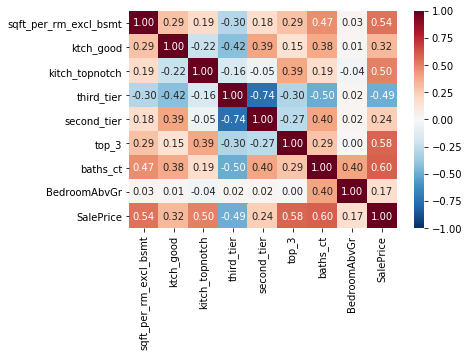

In [46]:
cols = "sqft_per_rm_excl_bsmt,ktch_good,kitch_topnotch,third_tier,second_tier,top_3,baths_ct,BedroomAbvGr,SalePrice".split(",")
sns.heatmap(
    data = homes[cols].corr(),
    fmt=".2f",
    annot=True,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1
)

In [54]:
ctrl_air_dummy = pd.get_dummies(data=homes["CentralAir"], drop_first=True).rename(columns={"Y": "ctrl_ac_yes"})

In [55]:
homes = pd.concat([homes, ctrl_air_dummy], axis="columns")

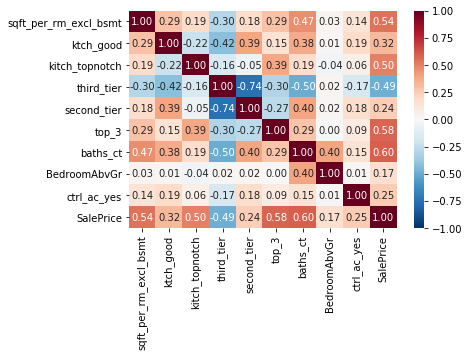

In [56]:
cols = "sqft_per_rm_excl_bsmt,ktch_good,kitch_topnotch,third_tier,second_tier,top_3,baths_ct,BedroomAbvGr,ctrl_ac_yes,SalePrice".split(",")
sns.heatmap(
    data = homes[cols].corr(),
    fmt=".2f",
    annot=True,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1
)

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
feature_list = "sqft_per_rm_excl_bsmt,ktch_good,kitch_topnotch,third_tier,second_tier,top_3,baths_ct,BedroomAbvGr,ctrl_ac_yes".split(",")
features = homes[feature_list]
target = homes["SalePrice"]
lr.fit(X=features, y=target)
lr.score(X=features, y=target)

0.7180089939969085

In [65]:
lr.coef_

array([   366.18239028,  20210.07437443, 102561.75108051,  21399.35888492,
        51263.55702072, 120449.99701164,  19022.65885899,   9828.17764453,
        26762.58888477])

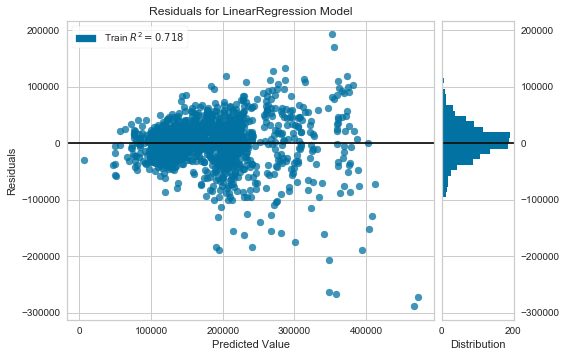

In [92]:
from yellowbrick.regressor import ResidualsPlot
rpv = ResidualsPlot(lr)
rpv.fit(X=homes[feature_list], y=target)
rpv.poof()
# shows a fanning effect towards higher predicted values 

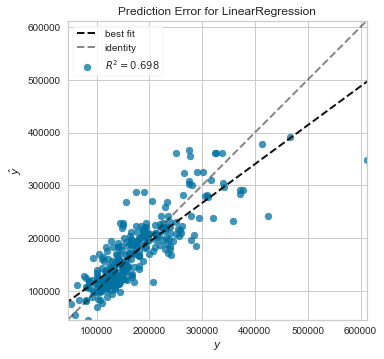

In [68]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(LinearRegression(), features, target)

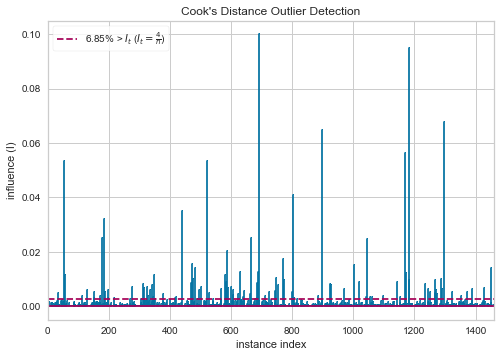

In [69]:
from yellowbrick.regressor import cooks_distance

cd_visualizer = cooks_distance(X=features, y=target)

In [71]:
import statsmodels.api as sm
X_add_constant = sm.add_constant(features)
ols = sm.OLS(target, X_add_constant)
ans = ols.fit()
print(ans.summary())

OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:32:32   Log-Likelihood:                -17620.
No. Observations:                1460   AIC:                         3.526e+04
Df Residuals:                    1450   BIC:                         3.531e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.756e+04   8900.440     -5.343    

In [74]:
print(ans.summary().tables[1])

                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.756e+04   8900.440     -5.343      0.000    -6.5e+04   -3.01e+04
sqft_per_rm_excl_bsmt   366.1824     29.329     12.485      0.000     308.651     423.714
ktch_good              2.021e+04   2884.302      7.007      0.000    1.46e+04    2.59e+04
kitch_topnotch         1.026e+05   5258.652     19.503      0.000    9.22e+04    1.13e+05
third_tier              2.14e+04   5387.557      3.972      0.000    1.08e+04     3.2e+04
second_tier            5.126e+04   5785.245      8.861      0.000    3.99e+04    6.26e+04
top_3                  1.204e+05   7025.365     17.145      0.000    1.07e+05    1.34e+05
baths_ct               1.902e+04   2638.009      7.211      0.000    1.38e+04    2.42e+04
BedroomAbvGr           9828.1776   1590.450      6.179      0.000    6708.349    1.29e+04
ctrl_ac_ye

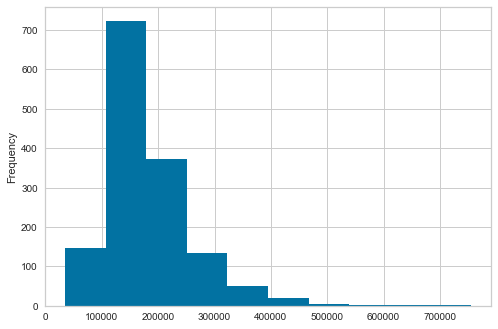

In [76]:
homes["SalePrice"].plot.hist()

In [94]:
target_log = homes["SalePrice"].apply(np.log)
target_log

Id
1       12.247694
2       12.109011
3       12.317167
4       11.849398
5       12.429216
          ...    
1456    12.072541
1457    12.254863
1458    12.493130
1459    11.864462
1460    11.901583
Name: SalePrice, Length: 1460, dtype: float64

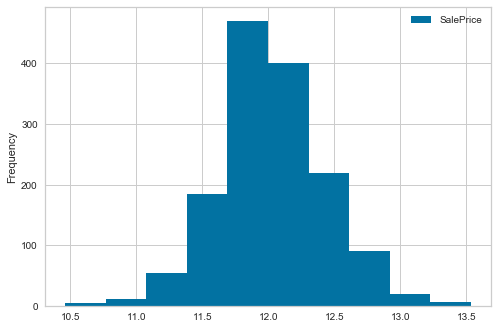

In [87]:
target_log.plot.hist()

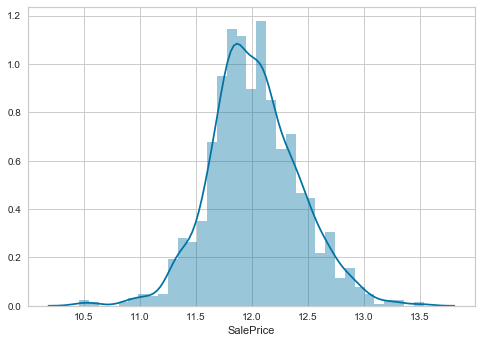

In [100]:
sns.distplot(target_log)

In [95]:
log_lr = LinearRegression()
log_lr.fit(X=features, y=target_log)
log_lr.score(X=features, y=target_log)

0.7495686773683811

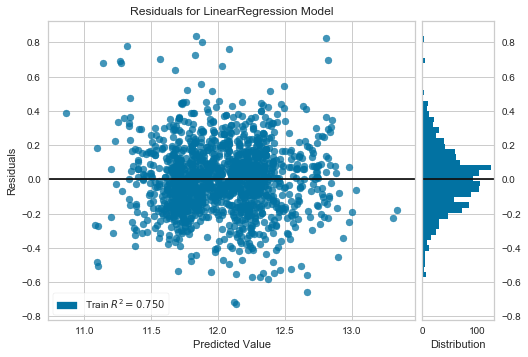

In [96]:
rpv_log = ResidualsPlot(log_lr)
rpv_log.fit(X=features, y=target_log)
rpv_log.poof()

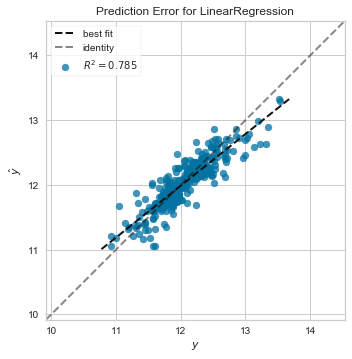

In [98]:
visualizer = prediction_error(LinearRegression(), features, target_log)

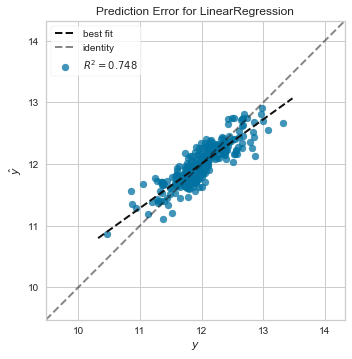

In [103]:
visualizer = prediction_error(log_lr, features, target_log)

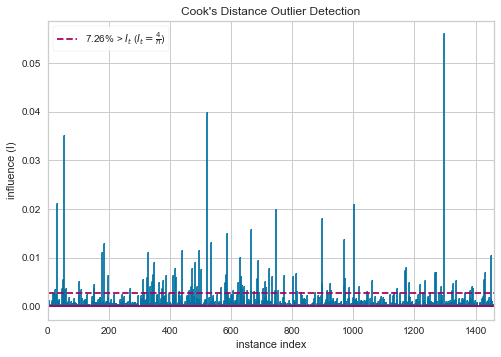

In [99]:
cd_visualizer = cooks_distance(X=features, y=target_log)

In [97]:
X_add_constant = sm.add_constant(features)
ols = sm.OLS(target_log, X_add_constant)
ans = ols.fit()
print(ans.summary())

OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     482.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):               0.00
Time:                        12:25:48   Log-Likelihood:                 279.37
No. Observations:                1460   AIC:                            -538.7
Df Residuals:                    1450   BIC:                            -485.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.5659      0.042    250.529    

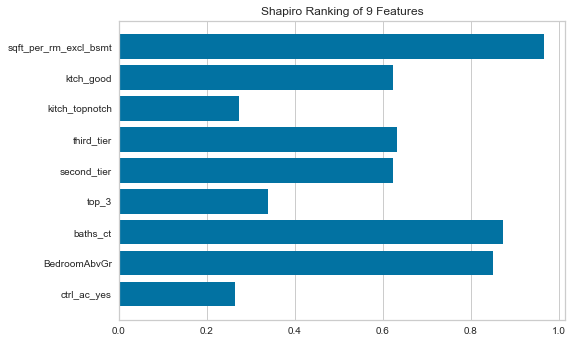

In [102]:
from yellowbrick.features import Rank1D

ft_rank_visualizer = Rank1D(algorithm='shapiro')
ft_rank_visualizer.fit(X=features, y=target_log)
ft_rank_visualizer.transform(X=features)
ft_rank_visualizer.show()

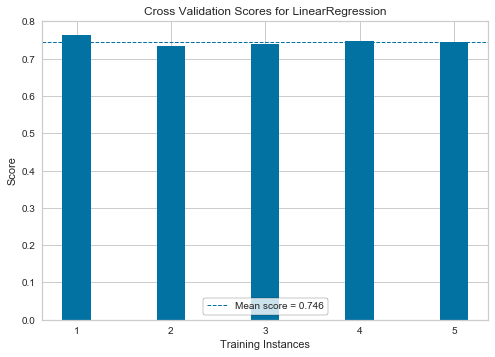

In [109]:
# Cross Validation
from sklearn.model_selection import KFold

from yellowbrick.model_selection import CVScores

# Instantiate the KFold settings
cv = KFold(n_splits=5, random_state=0)

lr_model = LinearRegression()
cv_visualizer = CVScores(model=lr_model, cv=cv, scoring="r2")

cv_visualizer.fit(X=features, y=target_log) # fit data into visualizer 
cv_visualizer.poof()

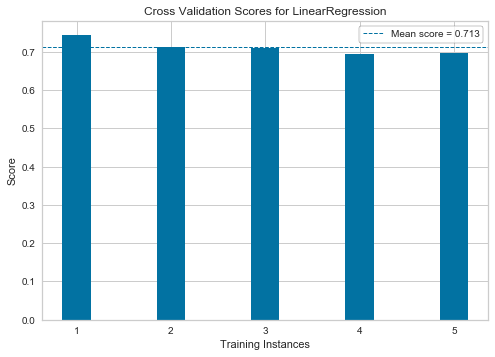

In [110]:
# Instantiate the KFold settings
cv = KFold(n_splits=5, random_state=0)

lr_model2 = LinearRegression()
cv_visualizer = CVScores(model=lr_model2, cv=cv, scoring="r2")

cv_visualizer.fit(X=features, y=target) # fit data into visualizer 
cv_visualizer.poof()

In [112]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
features_vif = "+".join(features.columns)

features_target = pd.concat([features, target], axis="columns")

y, X = dmatrices('SalePrice ~' + features_vif, features_target, return_type = "dataframe")

In [115]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [117]:
vif.round(1)

,VIF Factor,features
0,64.6,Intercept
1,1.4,sqft_per_rm_excl_bsmt
2,1.6,ktch_good
3,1.4,kitch_topnotch
4,5.9,third_tier
5,6.6,second_tier
6,3.6,top_3
7,2.3,baths_ct
8,1.4,BedroomAbvGr
9,1.1,ctrl_ac_yes
